## Data Exploration - Indo Online Health Consultation Dataset


### Data Exploration - Indo Online Health Consultation Dataset
 **Proyek:** Sistem Temu Kembali Informasi Konsultasi Kesehatan  
 **Nama:** Daffa Afaf Firmansyah  
 **NIM:** A11.2022.14166  
 **Dataset:** Indo Online Health Consultation (Mendeley Data)

### Tujuan Eksplorasi:
 1. Memahami struktur dan karakteristik dataset
 2. Mengidentifikasi kualitas data (missing values, duplicates, outliers)
 3. Analisis statistik deskriptif
 4. Visualisasi distribusi data
 5. Identifikasi challenges untuk preprocessing
 6. Menentukan sampling strategy (jika diperlukan)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from pathlib import Path

In [2]:
# Konfigurasi
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 100)

print("Libraries loaded successfully!")

Libraries loaded successfully!


In [3]:
# Load Dataset

# Path ke dataset
data_path = Path('../data/raw/Indo-Online Health Consultation-Multilabel-Raw.csv')

# Load data
print(f"Loading dataset from: {data_path}")
df = pd.read_csv(data_path)

print(f"Dataset loaded successfully!")
print(f"Shape: {df.shape[0]:,} rows × {df.shape[1]} columns")

Loading dataset from: ..\data\raw\Indo-Online Health Consultation-Multilabel-Raw.csv
Dataset loaded successfully!
Shape: 497,974 rows × 10 columns


In [4]:
# Tampilkan sample data
print("\nFirst 5 rows:")
df.head()


First 5 rows:


,title,question,question_date,answer,answer_date,topics,topic_set,risk,year,time_to_answer
0,Khasiat obat zinc sulphate,Dok saya mau tanya Anak saya kan kenak fimosis terus d kasih obat zincpro zinc sulphate drops 10...,"23 September 2017, 18:50","Hai Yevie, Terima kasih atas pertanyaannya. Zinc Sulphate merupakan salah satu mineral yang dib...","24 September 2017, 10:42",zinc-sulphate,zinc-sulphate,low,2017,0.0
1,Perbedaan jenis formula zinc,siang dokter.... dokter sayang ingin bertanya perbedaan serta khasiatnya bagi kesehatan tubuh ma...,"5 August 2017, 12:16","Halo Pendys, Zinc merupakan salah satu mineral yang dibutuhkan tubuh. Tubuh manusia mengandung ...","5 August 2017, 16:27",zinc-sulphate,zinc-sulphate,low,2017,0.0
2,Mengkonsumsi suplemen zinc yang sudah kadaluarsa,"Malam dok, saya baru menemukan suplemen zinc saya yg sudah lama, dan sudah kadaluarsa setahun ya...","12 December 2018, 20:54","Hai IriSh, Terimakasih telah bertanya ke Alodokter. Zinc (zinc sulfat) memiliki beragam manfa...","13 December 2018, 17:08",suplemen zinc-sulphate,zinc-sulphate,low,2018,0.0
3,Keamanan konsumsi suplemen zinc saat program hamil,"Dear dokter, Umur saya 24 tahun dan baru menikah selama dua bulan, keadaan saat ini saya belum h...","7 January 2019, 15:09","Selamat pagi, terimakasih atas pertanyaannya Suplementasi zinc menurut penelitian tidak menimbul...","8 January 2019, 09:32",suplemen zinc-sulphate,zinc-sulphate,low,2019,0.0
4,Suplemen apa yang banyak mengandung zinc.,Sakit flu tak kunjung sembuh disebabkan karena kekurangan Zinc dalam tubuh.pertanyaan saya obat/...,"30 March 2019, 06:05","Selamat malam, terimakasih atas pertanyaannya Meskipun tubuh manusia tidak membutuhkan zinc dala...","30 March 2019, 20:25",suplemen zinc-sulphate,zinc-sulphate,low,2019,0.0


### Basic Information

In [5]:
# Info dataset
print("Dataset Info:")
print("="*50)
df.info()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 497974 entries, 0 to 497973
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   title           497974 non-null  object 
 1   question        497974 non-null  object 
 2   question_date   497974 non-null  object 
 3   answer          497974 non-null  object 
 4   answer_date     497974 non-null  object 
 5   topics          497974 non-null  object 
 6   topic_set       497974 non-null  object 
 7   risk            497974 non-null  object 
 8   year            497974 non-null  int64  
 9   time_to_answer  497974 non-null  float64
dtypes: float64(1), int64(1), object(8)
memory usage: 38.0+ MB


In [6]:
# Nama kolom
print("\n Column Names:")
print(df.columns.tolist())


 Column Names:
['title', 'question', 'question_date', 'answer', 'answer_date', 'topics', 'topic_set', 'risk', 'year', 'time_to_answer']


In [7]:
# Tipe data
print("\n Data Types:")
print(df.dtypes)


 Data Types:
title              object
question           object
question_date      object
answer             object
answer_date        object
topics             object
topic_set          object
risk               object
year                int64
time_to_answer    float64
dtype: object


In [8]:
# Ukuran dataset
print("\n Dataset Size:")
print(f"Rows: {df.shape[0]:,}")
print(f"Columns: {df.shape[1]}")
print(f"Total Cells: {df.shape[0] * df.shape[1]:,}")
print(f"Memory Usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")


 Dataset Size:
Rows: 497,974
Columns: 10
Total Cells: 4,979,740
Memory Usage: 1179.89 MB


### Data Quality Check

In [9]:
# Missing values
print("Missing Values Analysis:")
print("="*50)
missing = df.isnull().sum()
missing_pct = (missing / len(df)) * 100
missing_df = pd.DataFrame({
    'Column': missing.index,
    'Missing Count': missing.values,
    'Percentage': missing_pct.values
}).sort_values('Missing Count', ascending=False)

print(missing_df[missing_df['Missing Count'] > 0])

Missing Values Analysis:
Empty DataFrame
Columns: [Column, Missing Count, Percentage]
Index: []


In [10]:
# Visualisasi missing values
if missing.sum() > 0:
    plt.figure(figsize=(10, 6))
    missing_df[missing_df['Missing Count'] > 0].plot(
        x='Column', y='Percentage', kind='bar', color='salmon'
    )
    plt.title('Missing Values by Column (%)', fontsize=14, fontweight='bold')
    plt.ylabel('Percentage (%)')
    plt.xlabel('Column')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
else:
    print("No missing values found!")

No missing values found!


In [11]:
# Duplicate rows
print("\n Duplicate Check:")
print("="*50)
duplicates = df.duplicated().sum()
print(f"Total Duplicate Rows: {duplicates:,} ({duplicates/len(df)*100:.2f}%)")

if duplicates > 0:
    print("\n Sample duplicate rows:")
    print(df[df.duplicated(keep=False)].head())


 Duplicate Check:
Total Duplicate Rows: 137,444 (27.60%)

 Sample duplicate rows:
                                                                              title  \
2                                  Mengkonsumsi suplemen zinc yang sudah kadaluarsa   
3                                Keamanan konsumsi suplemen zinc saat program hamil   
4                                         Suplemen apa yang banyak mengandung zinc.   
5  muntah disertai sakit tenggorokan dan sesak napas setelah minum Zinc dispersibel   
6                                         Konsumsi zinc pada penderita asam lambung   

                                                                                              question  \
2  Malam dok, saya baru menemukan suplemen zinc saya yg sudah lama, dan sudah kadaluarsa setahun ya...   
3  Dear dokter, Umur saya 24 tahun dan baru menikah selama dua bulan, keadaan saat ini saya belum h...   
4  Sakit flu tak kunjung sembuh disebabkan karena kekurangan Zinc dalam tubu

### Text Columns Analysis

In [12]:
# Identifikasi kolom teks
text_columns = [col for col in df.columns if df[col].dtype == 'object']
print(f"Text columns found: {text_columns}")

# Tampilkan sample dari setiap kolom teks
for col in text_columns[:3]:  # Batasi 3 kolom pertama
    print(f"\n{'='*60}")
    print(f"Column: {col}")
    print(f"{'='*60}")
    print(df[col].iloc[0])  # Sample text

Text columns found: ['title', 'question', 'question_date', 'answer', 'answer_date', 'topics', 'topic_set', 'risk']

Column: title
Khasiat obat zinc sulphate

Column: question
Dok saya mau tanya Anak saya kan kenak fimosis terus d kasih obat zincpro zinc sulphate drops 10mg/ml katanya buat vitamin untuk memperlancar BAKnya. La terus tak baca kok malah obat itu buat anak diare ya dok. Pdahal anak saya kmaren sebelum priksa 4 hari tidak bAB

Column: question_date
23 September 2017, 18:50


In [13]:
# Identifikasi kolom utama
question_col = None
answer_col = None

for col in df.columns:
    col_lower = col.lower()
    if 'question' in col_lower or 'pertanyaan' in col_lower:
        question_col = col
    if 'answer' in col_lower or 'jawaban' in col_lower:
        answer_col = col

print(f"Identified columns:")
print(f"Question column: {question_col}")
print(f"Answer column: {answer_col}")

Identified columns:
Question column: question_date
Answer column: time_to_answer


In [14]:
# Text length Analysis
df['title_length'] = df['title'].astype(str).str.len()
df['question_length'] = df['question'].astype(str).str.len()
df['answer_length'] = df['answer'].astype(str).str.len()

print("REVISED Text Length Statistics:")
print("="*60)
print("\n TITLE (Question Header):")
print(df['title_length'].describe())

print("\n QUESTION (Detailed Symptoms):")
print(df['question_length'].describe())

print("\n ANSWER (Doctor's Response):")
print(df['answer_length'].describe())

# Sample actual texts
print("\n" + "="*60)
print("SAMPLE DATA (First Row):")
print("="*60)
print(f"\nTitle: {df['title'].iloc[0]}")
print(f"\nQuestion: {df['question'].iloc[0][:200]}...")
print(f"\nAnswer: {df['answer'].iloc[0][:200]}...")
print(f"\nTopics: {df['topics'].iloc[0]}")
print(f"\nTopic Set: {df['topic_set'].iloc[0]}")

REVISED Text Length Statistics:

 TITLE (Question Header):
count    497974.000000
mean         45.759797
std          16.393444
min           1.000000
25%          34.000000
50%          44.000000
75%          56.000000
max         198.000000
Name: title_length, dtype: float64

 QUESTION (Detailed Symptoms):
count    497974.000000
mean        352.474730
std         285.493114
min           1.000000
25%         187.000000
50%         287.000000
75%         435.000000
max       41965.000000
Name: question_length, dtype: float64

 ANSWER (Doctor's Response):
count    497974.000000
mean       1519.213256
std         594.106723
min           1.000000
25%        1121.000000
50%        1421.000000
75%        1796.000000
max       24832.000000
Name: answer_length, dtype: float64

SAMPLE DATA (First Row):

Title: Khasiat obat zinc sulphate

Question: Dok saya mau tanya Anak saya kan kenak fimosis terus d kasih obat zincpro zinc sulphate drops 10mg/ml katanya buat vitamin untuk memperlancar BAKn

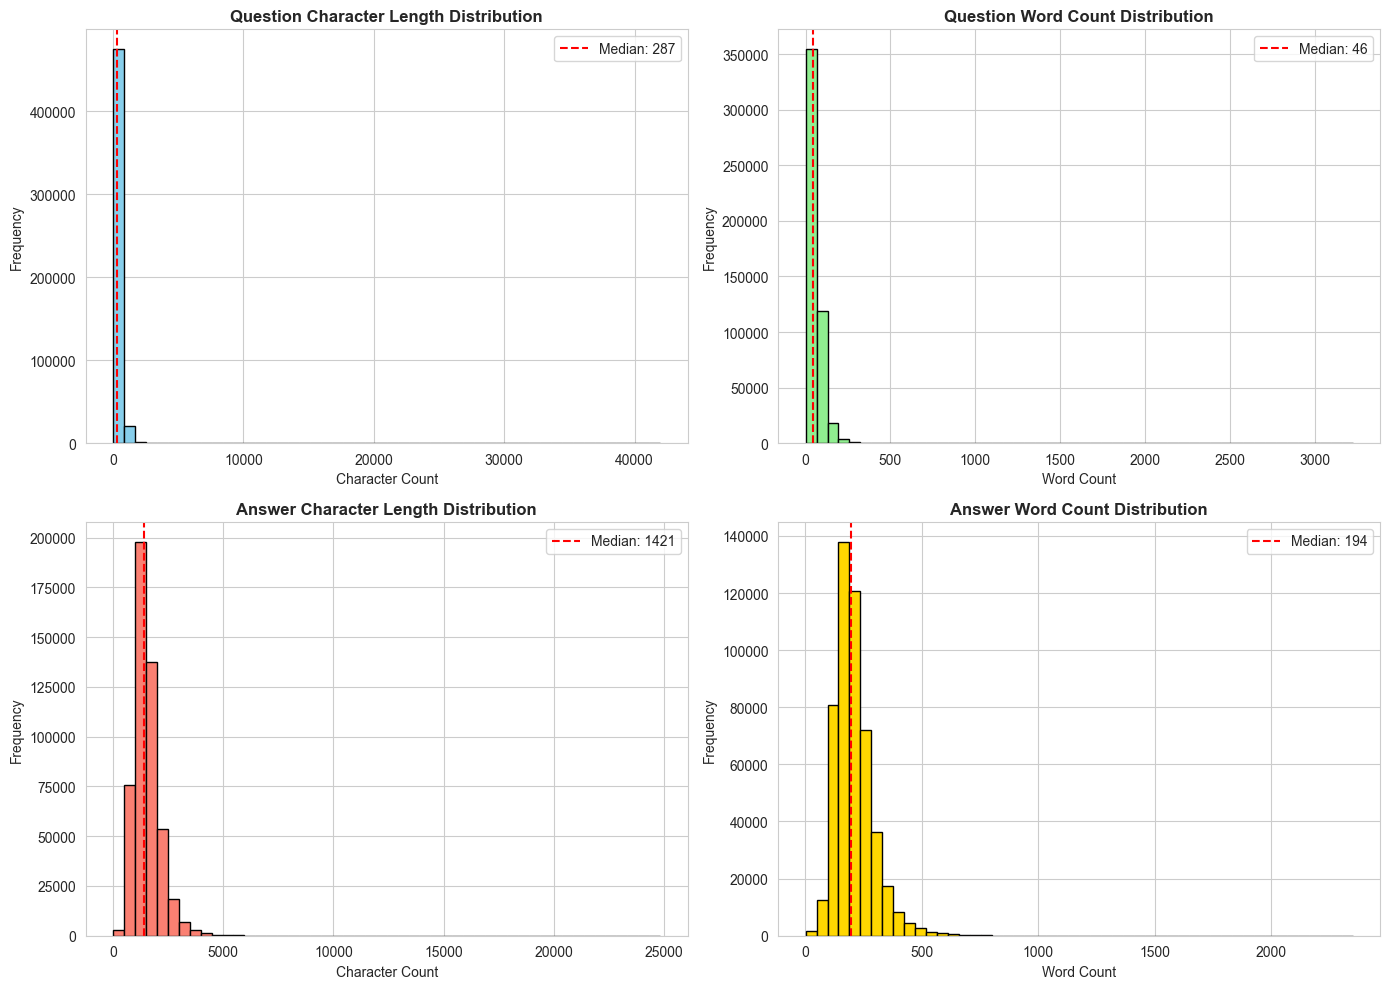

In [16]:
# Visualisasi distribusi panjang teks
# Pastikan kolom word count ada sebelum plotting
if 'question_word_count' not in df.columns:
    df['question_word_count'] = df['question'].astype(str).str.split().str.len()
if 'answer_word_count' not in df.columns:
    df['answer_word_count'] = df['answer'].astype(str).str.split().str.len()

if question_col and answer_col:
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    
    # Question character length
    axes[0, 0].hist(df['question_length'], bins=50, color='skyblue', edgecolor='black')
    axes[0, 0].set_title('Question Character Length Distribution', fontweight='bold')
    axes[0, 0].set_xlabel('Character Count')
    axes[0, 0].set_ylabel('Frequency')
    axes[0, 0].axvline(df['question_length'].median(), color='red', 
                       linestyle='--', label=f"Median: {df['question_length'].median():.0f}")
    axes[0, 0].legend()
    
    # Question word count
    axes[0, 1].hist(df['question_word_count'], bins=50, color='lightgreen', edgecolor='black')
    axes[0, 1].set_title('Question Word Count Distribution', fontweight='bold')
    axes[0, 1].set_xlabel('Word Count')
    axes[0, 1].set_ylabel('Frequency')
    axes[0, 1].axvline(df['question_word_count'].median(), color='red', 
                       linestyle='--', label=f"Median: {df['question_word_count'].median():.0f}")
    axes[0, 1].legend()
    
    # Answer character length
    axes[1, 0].hist(df['answer_length'], bins=50, color='salmon', edgecolor='black')
    axes[1, 0].set_title('Answer Character Length Distribution', fontweight='bold')
    axes[1, 0].set_xlabel('Character Count')
    axes[1, 0].set_ylabel('Frequency')
    axes[1, 0].axvline(df['answer_length'].median(), color='red', 
                       linestyle='--', label=f"Median: {df['answer_length'].median():.0f}")
    axes[1, 0].legend()
    
    # Answer word count
    axes[1, 1].hist(df['answer_word_count'], bins=50, color='gold', edgecolor='black')
    axes[1, 1].set_title('Answer Word Count Distribution', fontweight='bold')
    axes[1, 1].set_xlabel('Word Count')
    axes[1, 1].set_ylabel('Frequency')
    axes[1, 1].axvline(df['answer_word_count'].median(), color='red', 
                       linestyle='--', label=f"Median: {df['answer_word_count'].median():.0f}")
    axes[1, 1].legend()
    
    plt.tight_layout()
    plt.show()

In [17]:
# Identifikasi outliers (teks yang terlalu pendek atau panjang)
if question_col and answer_col:
    print("\n Potential Outliers:")
    print("="*60)
    
    # Terlalu pendek
    short_questions = df[df['question_length'] < 10]
    print(f"\n Very short questions (<10 chars): {len(short_questions):,}")
    if len(short_questions) > 0:
        print("\nSample:")
        print(short_questions[[question_col, 'question_length']].head())
    
    # Terlalu panjang
    long_questions = df[df['question_length'] > df['question_length'].quantile(0.99)]
    print(f"\n Very long questions (>99th percentile): {len(long_questions):,}")
    if len(long_questions) > 0:
        print(f"\nThreshold: {df['question_length'].quantile(0.99):.0f} characters")


 Potential Outliers:

 Very short questions (<10 chars): 83

Sample:
                 question_date  question_length
2556        28 May 2016, 11:33                3
23106      12 July 2017, 13:33                5
23721  14 February 2016, 10:47                2
27362     18 April 2018, 07:39                8
35223  17 February 2017, 07:10                3

 Very long questions (>99th percentile): 4,967

Threshold: 1344 characters


### Topic/Category Analysis

Category columns found: ['topics', 'topic_set']

Column: topics

Total unique categories: 58153

Top 10 categories:
topics
kehamilan                 8925
menstruasi                8908
kontrasepsi               3011
infeksi-saluran-kemih     2958
sakit-kepala              2678
menstruasi kontrasepsi    2654
keputihan                 2623
asam-lambung              2538
gangguan-pencernaan       2384
intim-laki-laki           2177
Name: count, dtype: int64


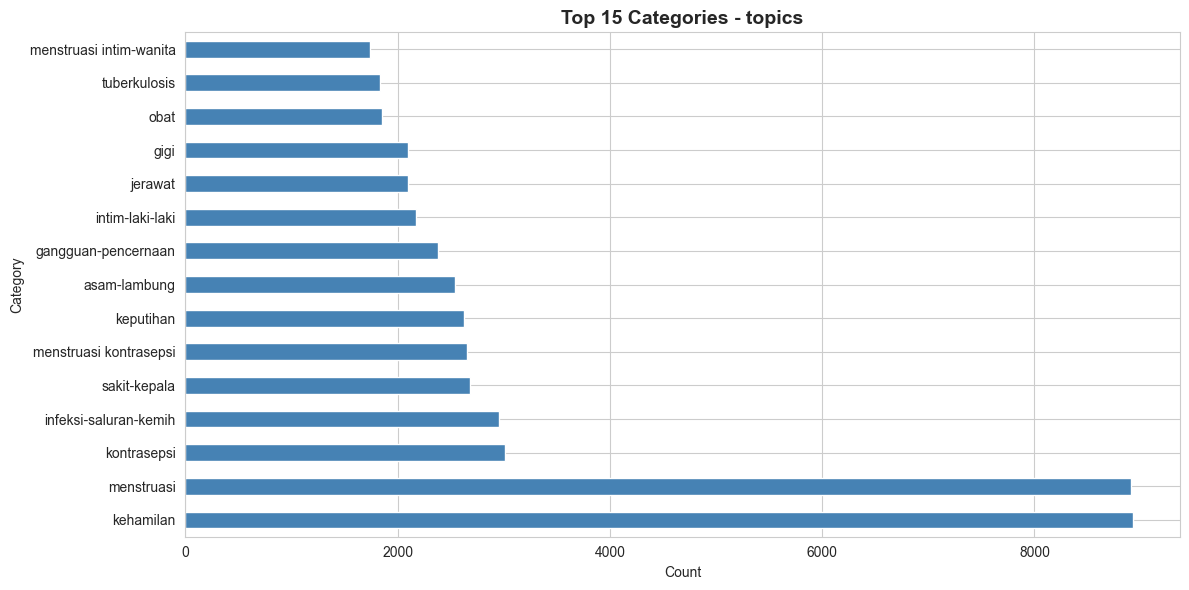


Column: topic_set

Total unique categories: 1541

Top 10 categories:
topic_set
kehamilan                15091
menstruasi               13098
obat                     12951
bayi                      9014
intim-wanita              7822
gangguan-pencernaan       7083
kontrasepsi               6993
tuberkulosis              6297
asam-lambung              5891
infeksi-saluran-kemih     5882
Name: count, dtype: int64


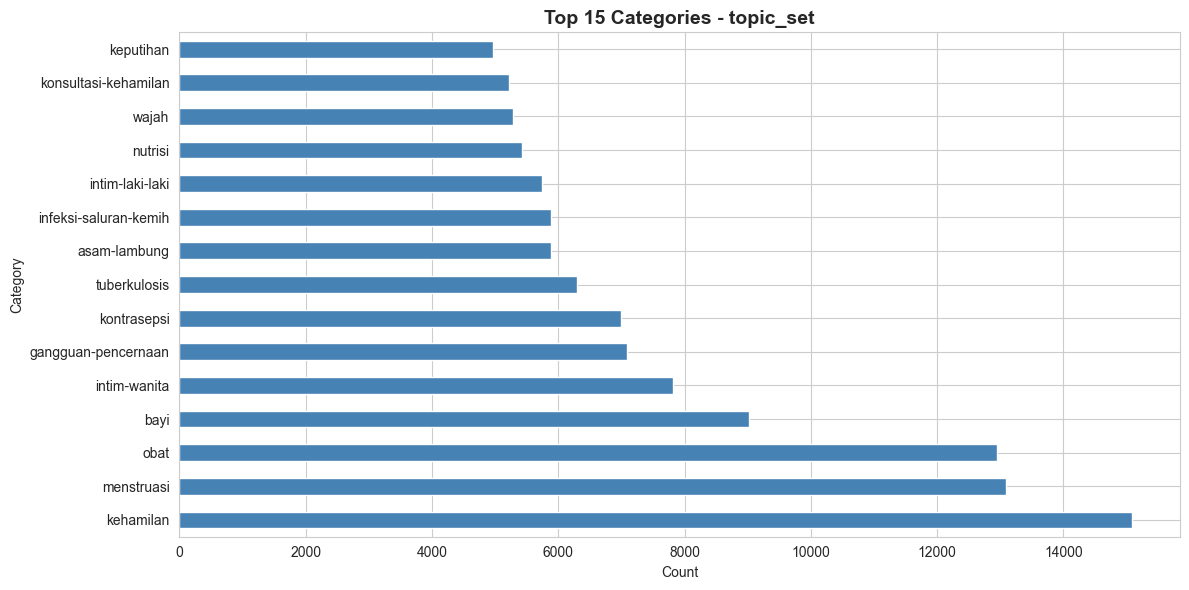

In [18]:
# Cek apakah ada kolom kategori/topik
category_cols = [col for col in df.columns if 'category' in col.lower() or 
                 'topic' in col.lower() or 'label' in col.lower()]

if category_cols:
    print(f"Category columns found: {category_cols}")
    
    for cat_col in category_cols:
        print(f"\n{'='*60}")
        print(f"Column: {cat_col}")
        print(f"{'='*60}")
        
        # Value counts
        value_counts = df[cat_col].value_counts()
        print(f"\nTotal unique categories: {df[cat_col].nunique()}")
        print(f"\nTop 10 categories:")
        print(value_counts.head(10))
        
        # Visualisasi
        plt.figure(figsize=(12, 6))
        value_counts.head(15).plot(kind='barh', color='steelblue')
        plt.title(f'Top 15 Categories - {cat_col}', fontsize=14, fontweight='bold')
        plt.xlabel('Count')
        plt.ylabel('Category')
        plt.tight_layout()
        plt.show()
else:
    print("No category/topic column found in dataset")

### Text Content Analysis

In [19]:
# Sample random texts untuk inspeksi manual
if question_col:
    print("Random Sample of Questions:")
    print("="*60)
    samples = df[question_col].dropna().sample(5, random_state=42)
    for i, text in enumerate(samples, 1):
        print(f"\n{i}. {text[:200]}...")

# %%
# Deteksi bahasa (simple check)
if question_col:
    import re
    
    def detect_indonesian_chars(text):
        """Simple check for Indonesian text"""
        if pd.isna(text):
            return False
        # Cek ada huruf Indonesia
        return bool(re.search(r'[a-zA-Z]', str(text)))
    
    df['has_indonesian'] = df[question_col].apply(detect_indonesian_chars)
    print(f"\n Language Check:")
    print(f"Texts with Indonesian characters: {df['has_indonesian'].sum():,} ({df['has_indonesian'].sum()/len(df)*100:.2f}%)")

Random Sample of Questions:

1. 7 November 2016, 23:28...

2. 10 August 2018, 20:42...

3. 1 October 2015, 05:29...

4. 10 February 2017, 01:39...

5. 11 October 2015, 17:22...

 Language Check:
Texts with Indonesian characters: 497,974 (100.00%)


In [20]:
# Deteksi special characters dan noise
if question_col:
    def check_text_quality(text):
        """Check for various text quality issues"""
        if pd.isna(text):
            return {'has_url': False, 'has_email': False, 'has_number': False}
        
        text = str(text)
        return {
            'has_url': bool(re.search(r'http[s]?://|www\.', text)),
            'has_email': bool(re.search(r'\S+@\S+', text)),
            'has_excessive_punct': text.count('!') + text.count('?') > 5,
            'has_number': bool(re.search(r'\d', text))
        }
    
    quality_checks = df[question_col].apply(check_text_quality).apply(pd.Series)
    
    print("\n Text Quality Analysis:")
    print("="*60)
    for col in quality_checks.columns:
        count = quality_checks[col].sum()
        pct = count / len(df) * 100
        print(f"{col}: {count:,} ({pct:.2f}%)")


 Text Quality Analysis:
has_url: 0 (0.00%)
has_email: 0 (0.00%)
has_excessive_punct: 0 (0.00%)
has_number: 497,974 (100.00%)


### Key Findings & Recommendations

In [21]:
print("=" * 70)
print(" " * 20 + "KEY FINDINGS")
print("=" * 70)

findings = f"""
DATASET OVERVIEW:
   • Total Records: {len(df):,}
   • Total Columns: {df.shape[1]}
   • Memory Usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB

DATA QUALITY:
   • Missing Values: {df.isnull().sum().sum():,} cells ({df.isnull().sum().sum()/(len(df)*df.shape[1])*100:.2f}%)
   • Duplicate Rows: {df.duplicated().sum():,} ({df.duplicated().sum()/len(df)*100:.2f}%)
"""

if question_col and answer_col:
    findings += f"""
TEXT STATISTICS:
   • Avg Question Length: {df['question_length'].mean():.0f} chars / {df['question_word_count'].mean():.0f} words
   • Avg Answer Length: {df['answer_length'].mean():.0f} chars / {df['answer_word_count'].mean():.0f} words
   • Median Question Length: {df['question_length'].median():.0f} chars
   • Median Answer Length: {df['answer_length'].median():.0f} chars
"""

print(findings)

                    KEY FINDINGS

DATASET OVERVIEW:
   • Total Records: 497,974
   • Total Columns: 16
   • Memory Usage: 1234.49 MB

DATA QUALITY:
   • Missing Values: 0 cells (0.00%)
   • Duplicate Rows: 137,444 (27.60%)

TEXT STATISTICS:
   • Avg Question Length: 352 chars / 56 words
   • Avg Answer Length: 1519 chars / 208 words
   • Median Question Length: 287 chars
   • Median Answer Length: 1421 chars



In [22]:
# Check duplicate characteristics
print(" DUPLICATE ANALYSIS:")
print("="*60)

# Sample duplicate data
duplicated_mask = df.duplicated(subset=['title', 'question', 'answer'], keep=False)
dup_sample = df[duplicated_mask].head(10)

print("\n Sample Duplicate Rows:")
print(dup_sample[['title', 'question', 'answer', 'topics', 'year']])

# Check if duplicates are across different years
print("\n Duplicate Distribution by Year:")
print(df[duplicated_mask]['year'].value_counts().sort_index())

# Check if same question gets different answers
same_q_diff_a = df.groupby(['title', 'question'])['answer'].nunique()
multi_answers = same_q_diff_a[same_q_diff_a > 1]
print(f"\n Same questions with different answers: {len(multi_answers):,}")

 DUPLICATE ANALYSIS:

 Sample Duplicate Rows:
                                                                               title  \
2                                   Mengkonsumsi suplemen zinc yang sudah kadaluarsa   
3                                 Keamanan konsumsi suplemen zinc saat program hamil   
4                                          Suplemen apa yang banyak mengandung zinc.   
5   muntah disertai sakit tenggorokan dan sesak napas setelah minum Zinc dispersibel   
6                                          Konsumsi zinc pada penderita asam lambung   
7                                             Tata cara dalam konsumsi Zinc sulphate   
8                                            Penggunaan zinc untuk bayi usia 1 bulan   
9                        Apakah kandungan zinc 1% pada serum aman untuk kulit wajah?   
10              Bolehkah menambahkan zink untuk anak usia 2 tahun yang sedang diare?   
11                   Apakah boleh mengonsumsi suplemen zinc untuk mengatas

## Strategy:

1. Keep duplicates yang punya different answers
2. Remove duplicates yang exact match (question + answer sama)

### Trade-off:

✅ Eliminate pure redundancy
✅ Keep valuable diversity
✅ Smaller dataset (faster training)
⚠️ Still some redundancy in questions